# Ice.Videogames-online

## Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Preprocesamiento de datos](#data_preprocessing)
    * [1.1 Preparación de los datos](#prep_data)
    * [1.2 Valores ausentes](#missing_values)
    * [1.3 Duplicados](#duplicates)
    * [1.4 Ventas Totales](#total_sales)
* [Etapa 2. Análisis de datos](#data_analysis)
    * [2.1 Juegos lanzados por año](#number_games)
    * [2.2 Ventas por plataforma](#platform_sales)
    * [2.3 Datos del periodo: 2013-2016. Modelo para el 2017 ](#data_year)
    * [2.4 Plataformas potencialmente rentables](#best_platform)
    * [2.5 Ventas globales de todos los videojuegos por plataforma](#global_sales)
    * [2.6 Relación entre reseñas y ventas](#review_and_sales)
    * [2.7 Comparación de ventas en diferentes plataformas](#sales_platforms)
    * [2.8 Géneros más rentables](#profitable_genres)
* [Etapa 3. Perfil de usuario para cada región](#user_profile)
    * [3.1 Plataformas principales por región](#principal_platforms)
    * [3.2 Géneros principales por región](#top_genres)
    * [3.3 Clasificaciones de Entertainment Software Rating Board (ESRB) y ventas por región](#ESRB_sales)
* [Etapa 4. Pruebas de hipótesis](#hypothesis)
    * 
[4.1 Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas](#grades)
    * [4.2 Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.](#grades2)
* [Conclusiones](#end)


## Introducción 

La industria de los videojuegos es uno de los sectores de entretenimiento con mayor crecimiento. Por lo que comprender qué factores influyen en el éxito comercial de un videojuego resulta esencial para que empresas distribuidoras y tiendas digitales puedan optimizar sus estrategias de venta. En este proyecto analizamos datos de la tienda online Ice, una distribuidora global de videojuegos, con el objetivo de identificar patrones o factores que determinen si un juego tiene éxito o no. 
El conjunto de datos incluye información de reseñas de usuarios y críticos, géneros, plataformas, ventas por región y la clasificación ESRB, que regula la edad recomendada según el contenido del juego. Utilizando estos datos del año 2016 planificaremos estrategias comerciales para el año 2017. Aunque el marco temporal es ficticio, el propósito principal es desarrollar habilidades sólidas en análisis exploratorio, modelado y toma de decisiones basadas en datos, aplicables a cualquier periodo o situación futura.

## Diccionario de datos


* 'name': (Nombre del videojuego) 
* 'platform': (Plataforma)
* 'year_of_release': (Año de lanzamiento)
* 'genre': (Género) 
* 'na_sales': (ventas en Norteamérica en millones de dólares estadounidenses) 
* 'eu_sales': (ventas en Europa en millones de dólares estadounidenses) 
* 'jp_sales': (ventas en Japón en millones de dólares estadounidenses) 
* 'other_sales': (ventas en otros países en millones de dólares estadounidenses) 
* 'critic_score': (máximo de 100) 
* 'user_score': (máximo de 10) 
* 'rating': (ESRB : Everyone 'E', nan, Mature +17 'M', Teen +13 'T', Everyone 10 and older 'E10+', Kids to Adults 'K-A', Adults Only +18 'AO', Early Childhood 'EC', Rating Pending 'RP')
* Nota: El rating K-A (Kids to Adults)  era una clasificación antigua de la ESRB: Apto para niños y adultos, es decir, todas las edades. Fue usado antes de 1997, y luego la ESRB lo reemplazó por E (Everyone).

In [ ]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
# Carga eldataset y observa la información 
df = pd.read_csv('/datasets/games.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08  

## 1. Preprocesamiento de datos 

## 1.1 Preparación de los datos 

In [ ]:
# nombre de columnas en minusculas 
df.columns= df.columns.str.lower().str.replace(' ', '_')
#convierte a tipo de dato adecuaodo
df['year_of_release']=df['year_of_release'].astype('Int64')
df['critic_score']=df['critic_score'].astype('Int64')
df.info()
#print(df.head())
#df['rating'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Observaciones : 
1.- se estandarizaron los nombres de columnas para evitar problemas por uso de mayúsculas/minúsculas y/o espacios. También para facilitar el acceso a los datos por columnas 
2.-Se cambió el tipo de datos para las columnas 'year_of_release' y 'critic_score' a tipo 'Int64'(no int) ya que no cuentan con parte decimal y porque pandas permite datos NaN en caso de que existan (y si existen). 3.-Nota: Más adelante tuve problemas con el Int64 para correlacionar tal vez lo mejor sería convertir las columnas 'critic_score'y'user_score' con valores NaN y tbd  utilizando esta linea : df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') que los convierte me parece a tipo float. Fue algo confuso a decir verdad.

## 1.2 Valores Ausentes 

In [ ]:
#Columna : 'name' 
print('# de Valores NaN:', df['name'].isnull().sum())
print(df[df['name'].isnull()])
df=df.dropna(subset=['name'])

# de Valores NaN: 2
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08          <NA>        NaN    NaN  
14244         0.00          <NA>        NaN    NaN  


En la columna 'name', encontramos 2 datos ausentes. 
Ambos registros tienen platform = GEN y year_of_release = 1993. Varias otras columnas también están vacías (genre, critic_score, user_score, rating). Esto sugiere que estos registros están incompletos tal vez por errores al recolectar los datos o son juegos cancelados o sin lanzamiento real.
Decidí eliminarlos, dado que no podemos identificarlo (sin nombre), no tiene datos importantes en otras columnas y su impacto en los resultados de análisis posteriores será mínimo.

In [ ]:
#Columna : 'year_of_release'
print('# de Valores NaN:', df['year_of_release'].isnull().sum())
print(df[df['year_of_release'].isnull()])

# de Valores NaN: 269
                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2             <NA>   
377                     FIFA Soccer 2004      PS2             <NA>   
456           LEGO Batman: The Videogame      Wii             <NA>   
475           wwe Smackdown vs. Raw 2006      PS2             <NA>   
609                       Space Invaders     2600             <NA>   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP             <NA>   
16405                      Freaky Flyers       GC             <NA>   
16448                          Inversion       PC             <NA>   
16458        Hakuouki: Shinsengumi Kitan      PS3             <NA>   
16522                       Virtua Quest       GC             <NA>   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01        

En la columna 'year_of_release', encontramos 269 datos ausentes. Los cuales se mantendrán ya que simplemente no se conoce la fecha de lanzamiento de algunos juegos. Estos registros se incluirán en los análisis donde la fecha no es crítica y se excluirán para análisis que si tomen en cuenta el año.

In [ ]:
#Columna : 'critic_score'
print('# de Valores NaN:', df['critic_score'].isnull().sum())
print(df[df['critic_score'].isnull()])

# de Valores NaN: 8576
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales 

En la columna 'critic_score', encontramos 8576 datos ausentes. Este es un número significativo de valores ausentes y parecen ser juegos antiguos o no muy populares  que no fueron evaluados por críticos. Se decidió mantener los valores ausentes para evitar llenar con la media de la columna o con valores neutrales (e.g. 50/ 100) que podrían sesgar eventualmente el análisis. En los análisis que requieran el ‘critic_score’, estos registros se excluyen.

In [ ]:
#Columna : 'user_score'
print('# de Valores NaN:', df['user_score'].isnull().sum())
print(df[df['user_score'].isnull()])

# de Valores NaN: 6699
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales 

La columna ‘user_score’ presenta 6699 valores ausentes y de igual manera que con la columna ‘critic_score’ parecen ser juegos antiguos o poco populares sin evaluaciones de usuarios. Se decidió mantener estos valores ausentes para evitar sesgos y quedarnos con los datos reales. En los análisis que requieran ‘user_score’, estos registros se excluyen temporalmente.

In [ ]:
#Columna : 'rating'
print('# de Valores NaN:', df['rating'].isnull().sum())
print(df[df['rating'].isnull()])

# de Valores NaN: 6764
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales 

La columna 'rating' presenta un número importante de valores ausentes (6764), y son al parecer juegos antiguos o no tan populares que no cuentan con clasificación ESRB. No se encontraron registros con valor 'TBD'. Se decidió mantener los valores ausentes.

In [ ]:
#DATOS RP or TBD 
print('# de Valores RP:', (df['rating']=='RP').sum())
print('# de Valores tbd:', (df['user_score']=='tbd').sum())
#ELIMINA LOS VALORES RP 
#print(df[df['rating']=='RP'])  #TBD
df = df[df['rating'] != 'RP']
#CONVIERTE VALORES tbd a NAN
df['user_score']= df['user_score'].replace('tbd',np.nan)

print('# de Valores RP:', (df['rating']=='RP').sum())
print('# de Valores tbd:', (df['user_score']=='tbd').sum())

# de Valores RP: 3
# de Valores tbd: 2424
# de Valores RP: 0
# de Valores tbd: 0


Se optó por eliminar 3 registros con rating = RP (‘Rating Pending’) debido a que representan juegos con ventas de casi 0  y, en dos casos, sin año de lanzamiento registrado. Su inclusión no aportaría información relevante al análisis y podría generar complicaciones en el manejo de la variable rating.
Por otro lado, convertimos los datos 'tbd' que se encontraron en la columna 'user_score' a datos NAN. Dado que son 2424 datos, no podemos eliminarlos porque perderíamos un buena parte de información. 

## 1.3 Duplicados 

In [ ]:
#Duplicados exactos 
df.duplicated().sum()

0

## 1.4 Ventas Totales

In [ ]:
# Calcula las ventas totales (suma de las ventas en todas las regiones) para cada juego 
df['total_sales'] = df['na_sales']+df['eu_sales']+ df['jp_sales']+ df['other_sales']
#df.info()
#print(df.head())

## 2. Análisis de datos 

## 2.1 Juegos lanzados por año

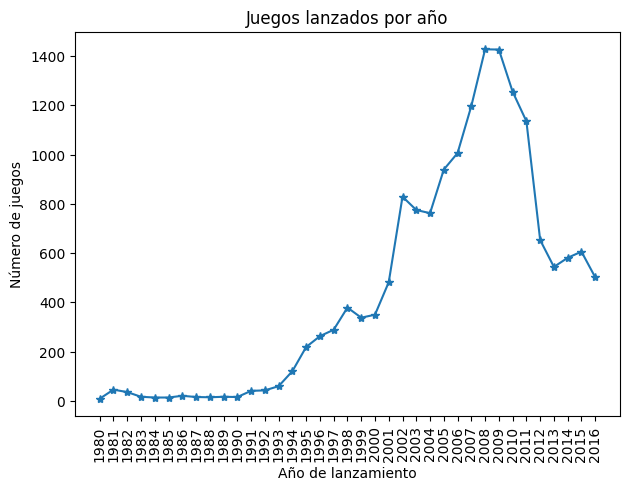

In [ ]:
games_per_year = df.groupby('year_of_release')['name'].count().reset_index().sort_index().rename(columns ={'name':'games_count'})
#print(games_per_year)

games_per_year.plot(kind='line',style= '-*', x= 'year_of_release', y='games_count',
                   legend= False, xlabel='Año de lanzamiento', ylabel='Número de juegos',
                   title='Juegos lanzados por año')
plt.xticks(games_per_year['year_of_release'])   # Mostrar todos los años
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Al analizar cuántos juegos se lanzaron por año, se observa que el período 1980–1993 contiene muy pocos juegos (menos de 60 por año). A partir de 1994 la cantidad de lanzamientos aumenta y desde 1998 hasta 2011 el volumen de datos es alto y estable (300 a más de 1400 juegos por año), lo que convierte este intervalo en el período más robusto y confiable del dataset.
Después de 2012 los conteos vuelven a disminuir, lo cual no significa necesariamente una caída real en la industria, sino una limitación del dataset, que suele estar incompleto después de 2016 o que faltan datos

## 2.2 Ventas por plataforma

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86
6       GBA       317.85
18      PS4       314.14
19      PSP       294.05
13       PC       259.43
   platform  year_of_release  total_sales
0        DS             1985         0.02
1        DS             2004        17.27
2        DS             2005       130.14
3        DS             2006       119.81
4        DS             2007       146.94
..      ...              ...          ...
62     X360             2012        99.74
63     X360             2013        88.58
64     X360             2014        34.74
65     X360             2015        11.96
66     X360             2016         1.52

[67 rows x 3 columns]


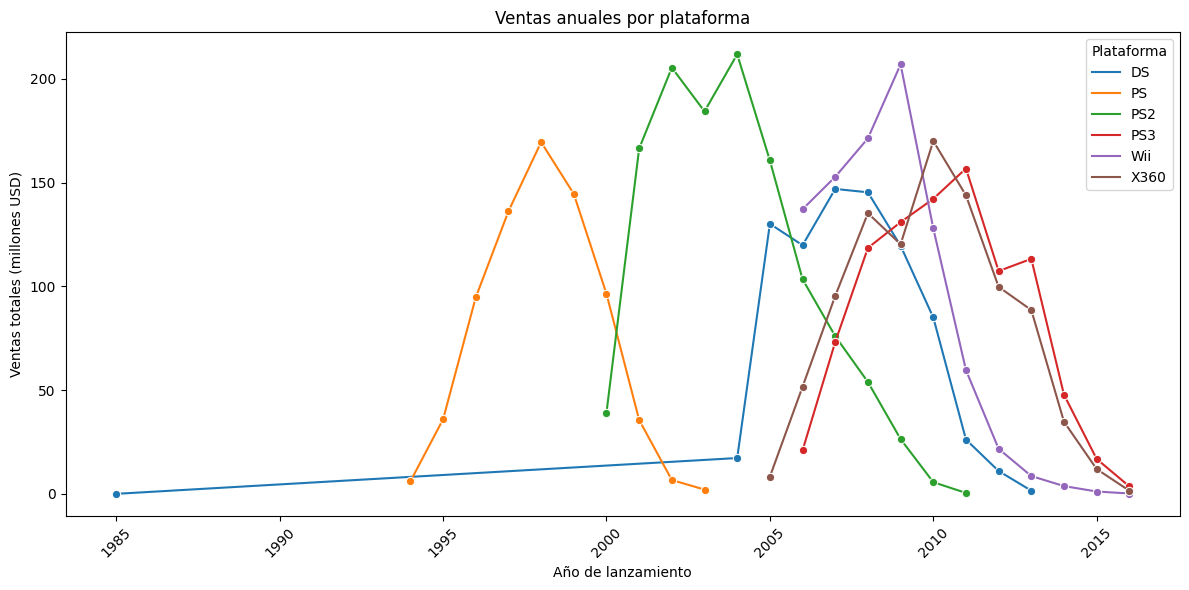

In [ ]:
#Obtener plataformas que venden más 
sales_per_platform = df.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales', ascending= False)
print(sales_per_platform.head(10))
#Agrupar por plataformas qué mas venden y el año
best_platforms = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS','PS'])]
best_platforms_year= best_platforms.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#pd.set_option('display.max_rows', 80)
print(best_platforms_year)
#Graficar
plt.figure(figsize=(12,6))
sns.lineplot(data=best_platforms_year, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Ventas anuales por plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones USD)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

In [ ]:
#Popularidad de las plataformas antes y después. Tiempo que tardan en aparecer y/o desaparecer las plataformas 
best_platforms_year= best_platforms_year.drop(index= 0)  #quitar dato del año 1995 plataforma  DS
platform_lifetime = best_platforms_year[best_platforms_year['total_sales']>0].groupby('platform')['year_of_release'].agg(['min','max']).reset_index()
platform_lifetime['lifetime_years'] = platform_lifetime['max'] - platform_lifetime['min'] + 1
print(platform_lifetime)
print('Promedio de años de vida de las plataformas:', platform_lifetime['lifetime_years'].mean())

  platform   min   max  lifetime_years
0       DS  2004  2013              10
1       PS  1994  2003              10
2      PS2  2000  2011              12
3      PS3  2006  2016              11
4      Wii  2006  2016              11
5     X360  2005  2016              12
Promedio de años de vida de las plataformas: 11.0


Consideramos 6 plataformas que concentran la mayor parte de ventas que son: PS2 (con 1255.77 millones de USD), X360 (con 971.42 millones de USD), PS3 (con 939.65 millones de USD), Wii (con 907.51 millones de USD)), DS (con 806.12 millones de USD) y PS (con 730.86 millones de USD). Las demás plataformas caen a ventas menores a los 318 millones de USD.
A partir de la gráfica obtenida de las ventas anuales se observa que la mayoría de las plataformas aparecen con ventas bajas (menos de 50 millones, excepto Wii), alcanzan un pico de ventas alrededor del 3er y 5to año. A partir de ahí los ingresos van declinando. 
Algunas de las plataformas que fueron populares y ahora ya no tienen ventas son PS (PlayStation original) 2003 último año con ventas, PS2 (2011 último año con ventas), DS (2013, último año con ventas), Wii  y X360 (solo contamos con datos hasta el 2016 y no sabemos si están completos).
Las plataformas de venta de juegos tienen una vida aproximada de 11 años. Aunque el promedio obtenido anteriormente fue de 14 debido a un dato en DS que inicia en 1985 y no en 2004  (tal vez un error del dataset o inicio y se echó para atrás hasta el 2004). Si eliminamos ese valor atípico la media es de 11 años 
En general, las plataformas tienen un ciclo de vida en el que cuando inician las ventas tienden a ser bajas, en los primeros años crecen (aumentan las ventas), alcanzan un máximo de ventas y después comienzan a disminuir progresivamente hasta su retiro con ventas casi nulas después de aproximadamente 10-12 años. 
Las plataformas más exitosas fueron PS2, X360, PS3, Wii y DS, controlando el mercado durante la década de 2000 y 2010 aproximadamente. Algunas de estas plataformas ya ahora obsoletas son PS, PS2, DS y Wii


##  2.3 Datos del periodo: 2013-2016. Modelo para el 2017 

¿Qué periodo de datos debemos usar para construir un modelo para el año 2017?
Sabemos que las plataformas tienen un ciclo de vida de 10- 12 años y que varias plataformas estaban en declive u obsoletas incluso antes del 2016. 
Entonces tomaremos datos de un periodo de 2013 a 2016 porque incluyen plataformas activas como PS4 (desde 2013), XOne (2013), Nintendo 3DS y a final de vida de PS3 y X360. Evitaremos incluir las que ya no tenían ventas para 2013 como PS2, PS, DS y Wii 
Considero que este intervalo puede reflejar el mercado de esos años y ayudarnos a predecir el del 2017 porque incluye las plataformas activas y excluye datos antiguos que ya no representaban los patrones vigentes de consumo de esos años. 

In [ ]:
df_recent = df[df['year_of_release'] >= 2013]

## 2.4 Plataformas potencialmente rentables 

In [ ]:
#Encuentra plataformas líderes en ventas 
top_platforms = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(top_platforms.head(6))

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
Name: total_sales, dtype: float64


   platform  year_of_release  total_sales
0       3DS             2013        56.57
1       3DS             2014        43.76
2       3DS             2015        27.78
3       3DS             2016        15.14
4       PS3             2013       113.25
5       PS3             2014        47.76
6       PS3             2015        16.82
7       PS3             2016         3.60
8       PS4             2013        25.99
9       PS4             2014       100.00
10      PS4             2015       118.90
11      PS4             2016        69.25
12     X360             2013        88.58
13     X360             2014        34.74
14     X360             2015        11.96
15     X360             2016         1.52
16     XOne             2013        18.96
17     XOne             2014        54.07
18     XOne             2015        60.14
19     XOne             2016        26.15


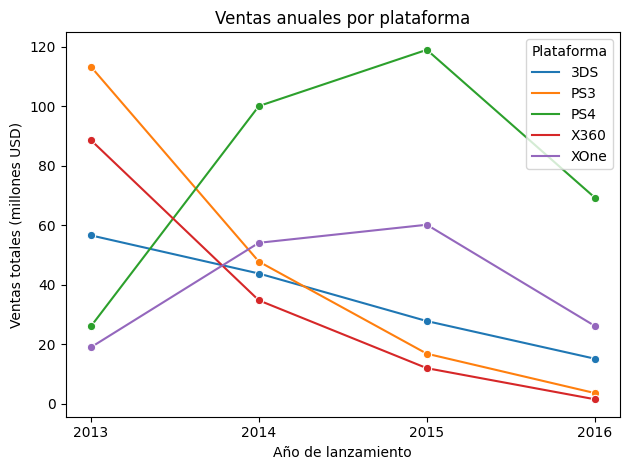

In [ ]:
#Agrupar por plataformas qué mas venden y el año
top_platforms2 = df_recent[df_recent['platform'].isin(['PS4','PS3','XOne','3DS','X360'])]
top_platforms2_year= top_platforms2.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
print(top_platforms2_year)
#Graficar
sns.lineplot(data=top_platforms2_year, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Ventas anuales por plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones USD)')
plt.xticks(top_platforms2_year['year_of_release'].unique()) 
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

Las plataformas que son líderes en ventas según las ventas totales del periodo 2013-2016 fueron PS4 (314.14 millones de USD), PS3 (181.43), XOne (159.32), 3DS (143.25) y X360(136.80). 
¿Cuáles de las plataformas crecen y cuáles no?  PS4 crece, XOne crece también aunque en menor medida, PS3 y X3560  en declive y 3DS genera ingresos pero va gradualmente decreciendo. 
Basado en el periodo 2013–2016, las plataformas con mejor proyección para 2017 pueden ser PS4 porque lidera las ventas totales y a pesar de que no se cuentan con todos los datos de 2016 sigue muy por encima de las demás. También XOne y 3DS aunque esta última ya en declive.

## 2.5 Ventas globales de todos los videojuegos por plataforma 

      platform  total_sales
16         PS3        21.05
23        X360        16.27
31         PS4        14.63
33         3DS        14.60
42         PS4        12.62
...        ...          ...
16672     XOne         0.01
16674      PS3         0.01
16677      3DS         0.01
16691      PS3         0.01
16710      PS3         0.01

[1473 rows x 2 columns]


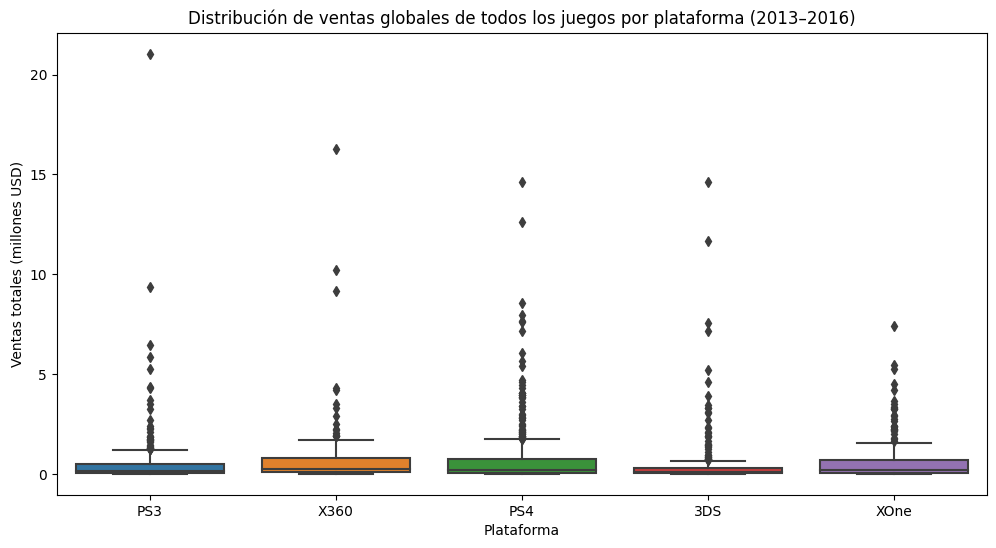

In [ ]:
df_recent = df[df['year_of_release'] >= 2013]
df_box = df_recent[['platform', 'total_sales']]
df_box = df_box[df_box['platform'].isin(['PS4','PS3','XOne','3DS','X360'])]
print(df_box)

plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, x='platform', y='total_sales')
plt.title('Distribución de ventas globales de todos los juegos por plataforma (2013–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones USD)')
plt.show()


In [ ]:
#VENTAS PROMEDIO POR PLATAFORMA 
avg_sales = df_box.groupby('platform')['total_sales'].agg(['mean', 'median','var','std']).sort_values(by='mean', ascending=False)
print(avg_sales)

              mean  median       var       std
platform                                      
PS4       0.801378   0.200  2.590350  1.609456
X360      0.735484   0.265  2.766484  1.663275
XOne      0.645020   0.220  1.073584  1.036139
PS3       0.525884   0.150  2.108128  1.451939
3DS       0.472772   0.090  1.908119  1.381347


Cuando observamos los promedios de las ventas podemos darnos cuenta que existen diferencias  en las ventas entre plataformas (no sabemos si son significativas). Mientras PS4 y X360 tienen juegos más exitosos en promedio, PS3 y 3DS tienen ventas promedio más bajas. Sus medianas son similares lo que quiere decir que en todas las plataformas que analizamos hay muchos juegos con ventas bajas. La varianza y la desviación estándar son altas lo que indica gran dispersión en las ventas (muchos juegos venden poco y uno pocos mucho) 
PS4 y X360 lideran ventas promedio, aunque la mayoría de sus títulos vende menos de 1 millón, hay unos pocos éxitos enormes (outliers en el boxplot). XOne está en crecimiento, con ventas promedio moderadas. PS3 y 3DS tienen ventas promedio más bajas y muchos juegos con ventas casi nulas.

## 2.6 Relación entre reseñas y ventas 

      platform  total_sales  critic_score user_score
31         PS4        14.63          <NA>        NaN
42         PS4        12.62            97        8.3
77         PS4         8.58            82        4.3
87         PS4         7.98          <NA>        NaN
92         PS4         7.66            83        5.7
...        ...          ...           ...        ...
16500      PS4         0.01            69        7.5
16503      PS4         0.01          <NA>        NaN
16526      PS4         0.01            61        7.9
16530      PS4         0.01            51        5.5
16585      PS4         0.01          <NA>        NaN

[392 rows x 4 columns]


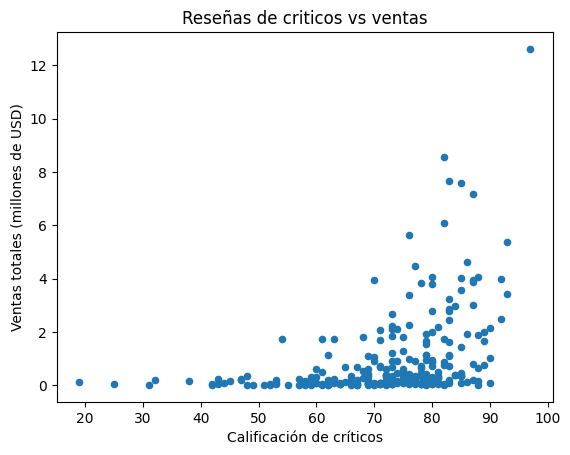

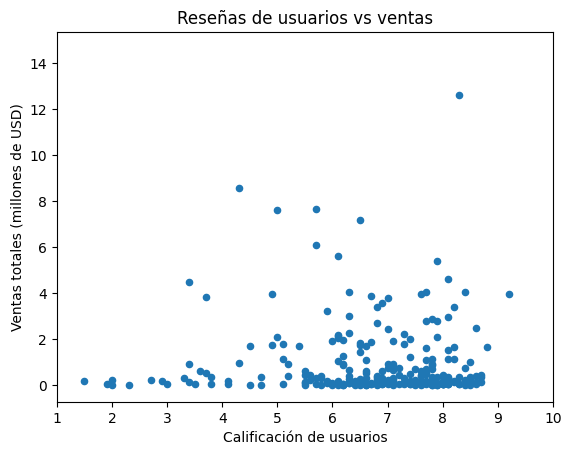

In [ ]:

#¿Cómo afectan las reseñas de usuarios y profesionales a las ventas de una plataforma?
#Plataforma popular elegida: PS4
user_critic_score = df_recent[['platform', 'total_sales','critic_score','user_score']]
user_critic_score = user_critic_score[user_critic_score['platform']== 'PS4']
print(user_critic_score)

#Graficar
user_critic_score.plot(kind='scatter', x= 'critic_score', y='total_sales',
                   legend= False, xlabel='Calificación de críticos', ylabel='Ventas totales (millones de USD)',
                   title='Reseñas de criticos vs ventas')
plt.show()


user_critic_score.plot(kind='scatter', x= 'user_score', y='total_sales',
                   legend= False, xlabel='Calificación de usuarios', ylabel='Ventas totales (millones de USD)',
                   title='Reseñas de usuarios vs ventas', xlim =[1,10])
plt.show()


In [ ]:
#Calcular correlaciones 
#user_critic_score.info()
user_critic_score['user_score'] = pd.to_numeric(user_critic_score['user_score'], errors='coerce')
user_critic_score['critic_score'] = pd.to_numeric(user_critic_score['critic_score'], errors='coerce')
temp = user_critic_score[['critic_score', 'total_sales','user_score']].dropna()
temp['critic_score'] = temp['critic_score'].astype(float)

print('Correlación Reseñas de criticos vs ventas :', temp['critic_score'].corr(temp['total_sales']))
print('Correlación Reseñas de usuarios vs ventas :', temp['user_score'].corr(temp['total_sales']))

Correlación Reseñas de criticos vs ventas : 0.40589480145836687
Correlación Reseñas de usuarios vs ventas : -0.03362497596528878


El valor de la correlación entre reseñas de críticos y las ventas totales fue de r= 0.406, lo cual indica que existe una relación débil-moderada  positiva y significa que en general los juegos que reciben mejores reseñas se compran (aunque no mucho) pero también existen algunos pocos juegos que tienen buenas reseñas y se compran mucho. No hay una relación perfecta pero si indica que las opiniones profesionales pueden influir en la decisión de compra de los usuarios. 
El valor de la correlación entre reseñas de usuarios y las ventas totales fue de r= -0.034, lo cual indica que no existe relación entre ambas variables y una no depende de o influye a la otra. No es útil predecir ventas con calificaciones de usuarios, es mejor usarlas como referencia para mejorar los juegos 

## 2.7 Comparación de ventas en diferentes plataformas 

In [ ]:
games = df_recent[['name','platform', 'total_sales']]
games_PS4= games[games['platform']== 'PS4']
#Nombres de los videojuegos que se venden en la plataforma PS4
games_name_PS4 = games_PS4['name'].sort_values(ascending=True)
#Unir df para encontrar los juegos de PS4 en otras plataformas
other_platforms = pd.merge(games_name_PS4,games,on='name',how='inner').sort_values(by='name', ascending=True)
#print(other_platforms.head(30))

platform
PS4     314.14
XOne    129.36
PS3     127.35
X360    107.29
PC       22.52
PSV      11.85
WiiU     11.52
Wii      11.17
3DS       5.50
DS        0.38
PSP       0.24
Name: total_sales, dtype: float64


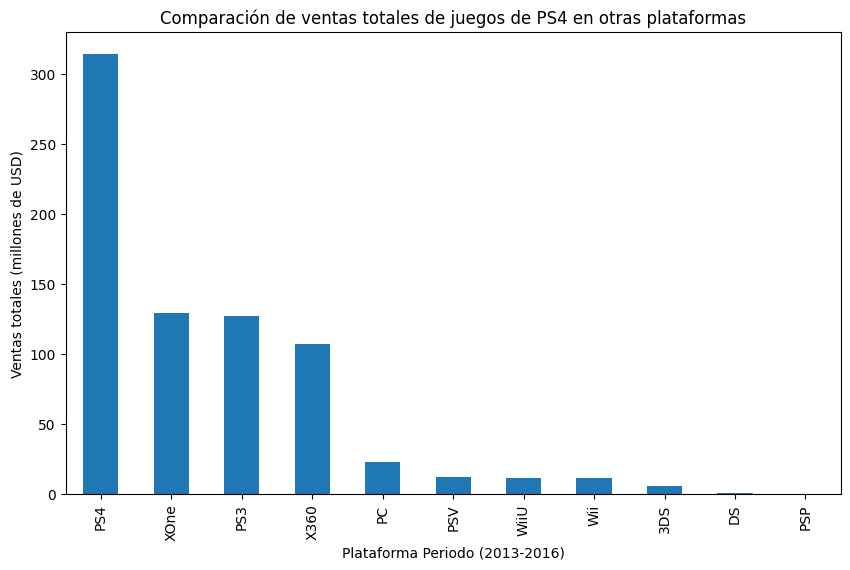

In [ ]:
#Agrupar ventas por plataforma 
comparison = other_platforms.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(comparison)
#graficar 
plt.figure(figsize=(10,6))
comparison.plot(kind='bar',xlabel ='Plataforma Periodo (2013-2016)',ylabel='Ventas totales (millones de USD)',
                title='Comparación de ventas totales de juegos de PS4 en otras plataformas')
plt.show()

                                          name platform  total_sales
0                                7 Days to Die      PS4         0.14
1                                7 Days to Die     XOne         0.05
2   Adventure Time: Finn & Jake Investigations      PS4         0.10
3   Adventure Time: Finn & Jake Investigations      PS3         0.08
4   Adventure Time: Finn & Jake Investigations      3DS         0.09
5   Adventure Time: Finn & Jake Investigations     X360         0.09
6   Adventure Time: Finn & Jake Investigations     XOne         0.05
7   Adventure Time: Finn & Jake Investigations     WiiU         0.05
9           Aegis of Earth: Protonovus Assault      PS4         0.02
10          Aegis of Earth: Protonovus Assault      PS3         0.02
8           Aegis of Earth: Protonovus Assault      PSV         0.03
11           Agatha Christie's The ABC Murders      PS4         0.02
12           Agatha Christie's The ABC Murders     XOne         0.01
13            Akiba's Trip: Undead

<Figure size 1600x800 with 0 Axes>

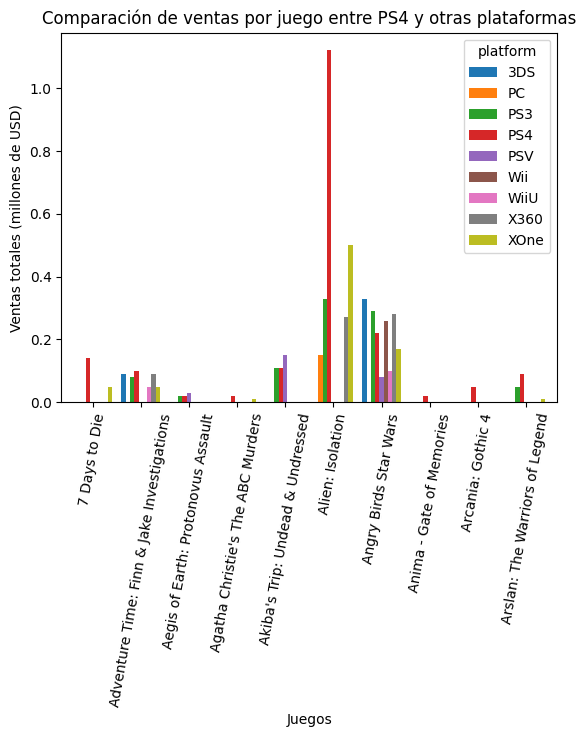

In [ ]:
#Comparar juego por juego 
game_comparison = other_platforms[['name','platform','total_sales']].sort_values(by='name')
#print(game_comparison)
#Reducir el número de juegos a visualizar
game_comparison2 = game_comparison.iloc[0:34]
#game_comparison2 = game_comparison.iloc[35:59]
#game_comparison2 = game_comparison.iloc[60:87]
#game_comparison2 = game_comparison.iloc[88:115]
#game_comparison2 = game_comparison.iloc[115:149]
#game_comparison2 = game_comparison.iloc[150:179]
#game_comparison2 = game_comparison.iloc[180:210]

print(game_comparison2)
pivot_game_comparison = game_comparison2.pivot(index='name', columns='platform', values='total_sales')
#Graficar
plt.figure(figsize=(16,8))
pivot_game_comparison.plot(kind='bar', width=0.8,xlabel='Juegos',ylabel='Ventas totales (millones de USD)',
                           title='Comparación de ventas por juego entre PS4 y otras plataformas')
plt.xticks(rotation=80)
plt.show()
#PARA VISUALIZAR TODOS LOS DATOS
#pd.set_option('display.max_rows', 2000)
#print(game_comparison)

Dado que estamos comparando las ventas de juegos que se venden en la plataforma PS4 con otras plataformas, encontramos que el total de ventas es mucho más alto para PS4, con 314.14 millones de USD, casi el triple que la segunda plataforma, XOne, considerando el periodo 2013-2016.
Aunque para la mayoría de los videojuegos analizados las ventas son mayores en PS4, encontramos algunos títulos que se vendieron más en otras plataformas:
•	Angry Birds Star Wars (PS4: 0.22 / PS3: 0.29)
•	Assassin's Creed IV: Black Flag (PS4: 2.86 / PS3: 3.71)
•	Call of Duty: Ghosts (PS4: 3.83 / X360: 10.24)
•	Dark Souls II (PS4: 0.61 / PS3: 1.28)
•	Disney Infinity 2.0 (PS4: 0.62 / X360: 1.08)
•	Farming Simulator 2015 (PS4: 0.36 / PC: 1.19)
•	Grand Theft Auto V (PS4: 12.62 / PS3: 21.05)
•	Otros títulos como Deadpool, DmC: Devil May Cry, FIFA 14, Final Fantasy XIV, Injustice: Gods Among Us y las series Just Dance y LEGO Marvel Super Heroes también tuvieron mejores ventas en otras plataformas.
Por lo tanto, sería bueno priorizar el lanzamiento y promoción de juegos en PS4, seguido de XOne y PS3, mientras que otras plataformas como PC, X360 o Wii deberían considerarse según el tipo de juego y el público objetivo.

## 2.8 Géneros más rentables 

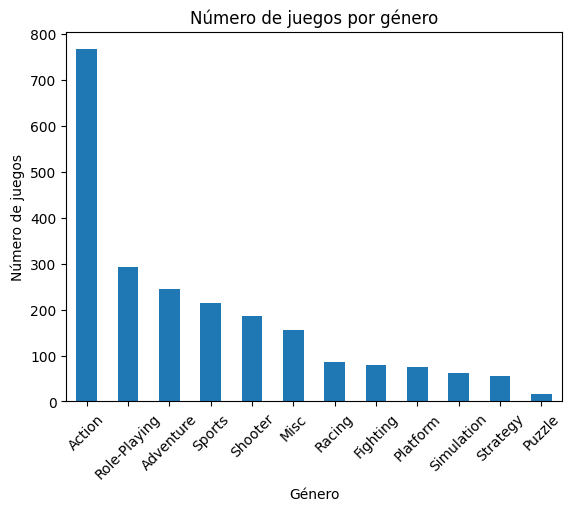

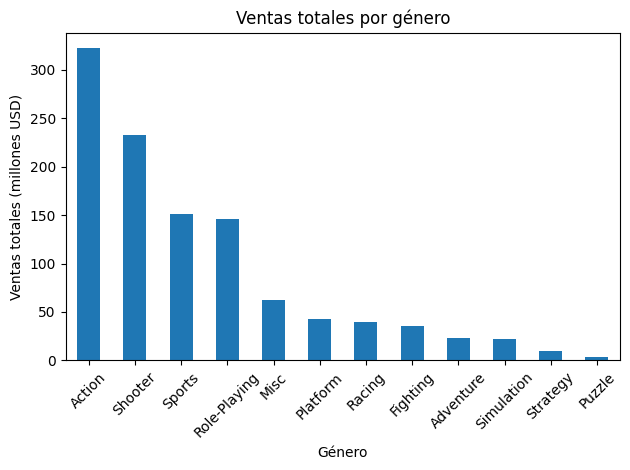

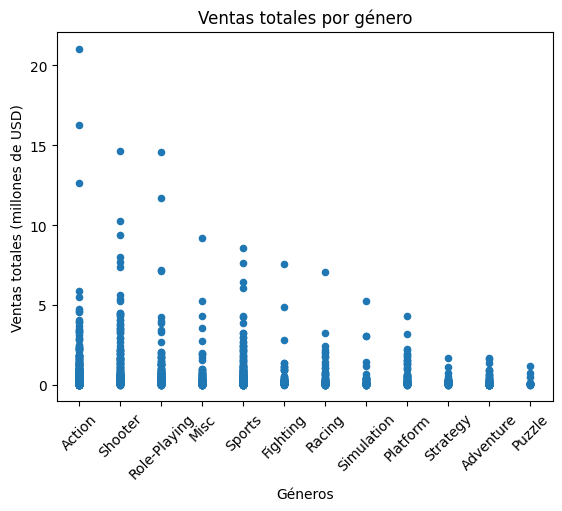

In [ ]:
#Distribución de juegos por género 
genre_counts = df_recent['genre'].value_counts()
#print(genre_counts)
#GRAFICAR
genre_counts.plot(kind='bar',xlabel= 'Género',ylabel='Número de juegos',title='Número de juegos por género')
plt.xticks(rotation=45)
plt.show()

#Géneros más rentables 
best_genres = df_recent.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
#print(best_genres)
best_genres.plot(kind='bar', xlabel='Género', ylabel='Ventas totales (millones USD)',
                 title='Ventas totales por género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

genres= df_recent[['genre','total_sales']]
genres.plot(kind='scatter', x= 'genre', y='total_sales',
                   legend= False, xlabel='Géneros', ylabel='Ventas totales (millones de USD)',
                   title='Ventas totales por género')
plt.xticks(rotation=45)
plt.show()


                  mean  median       var       std
genre                                             
Shooter       1.245882   0.450  4.056627  2.014107
Sports        0.703972   0.240  1.486540  1.219237
Platform      0.576081   0.225  0.650939  0.806808
Role-Playing  0.499623   0.125  1.831052  1.353164
Racing        0.469294   0.120  0.929490  0.964101
Fighting      0.441375   0.125  1.100156  1.048883
Action        0.420196   0.110  1.572289  1.253909
Misc          0.405290   0.100  1.016033  1.007985
Simulation    0.350968   0.100  0.721078  0.849163
Puzzle        0.186471   0.060  0.105737  0.325172
Strategy      0.180000   0.080  0.078087  0.279441
Adventure     0.096490   0.030  0.046848  0.216445


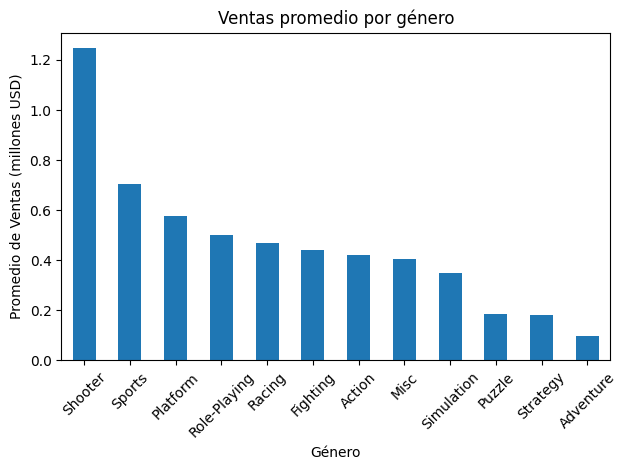

In [ ]:
#VENTAS PROMEDIO POR GÉNERO 
best_genres_mean = df_recent.groupby('genre')['total_sales'].agg(mean ='mean',median='median',var='var',
                                                                 std='std').sort_values(by='mean',ascending = False)
print(best_genres_mean)
best_genres_mean['mean'].plot(kind='bar', xlabel='Género', ylabel='Promedio de Ventas (millones USD)',
                 title='Ventas promedio por género')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Al analizar la cantidad de juegos lanzados por género en el periodo 2013–2016, se observa que hay más juegos de Action (766 juegos), Role-Playing, Adventure, Sports y Shooter. En contraste con géneros como Puzzle, Strategy y Simulation tienen muy pocos títulos, lo cual indica un mercado más reducido.
Sin embargo, al evaluar cuáles géneros son más rentables, es importante considerar tanto las ventas totales como las ventas promedio por juego, ya que algunos géneros tienen muchos más títulos que otros.
En términos de ventas totales, los géneros más fuertes son: Action, Shooter, Sports y Role-Playing. Esto se debe en gran parte a que son géneros con una gran cantidad de juegos lanzados. Sin embargo la mayoría de estos juegos no vende mucho (< 5 millones de USD) y solo tiene algunos que llegan a vender mucho (> 10 millones de USD).
Cuando evaluamos la rentabilidad por juego (ventas promedio), el patrón cambia:
Shooter es el género más rentable por título, seguido por Sports, Platform, Role-Playing, Racing y Fighting. Esto indica que, aunque hay menos juegos Shooter comparados con Action, cada juego Shooter vende mucho más en promedio.
Por otro lado géneros como Adventure, Strategy y Puzzle presentan ventas promedio bajas, por lo que tienden a ser menos rentables, incluso cuando su número total de juegos es moderado.
En resumen hay muchos juegos de Action, pero no necesariamente son los más rentables por título. Shooter y Sports destacan como los más rentables por juego, lo que refleja una alta demanda y menor variabilidad en ventas. Y géneros pequeños como Puzzle y Strategy muestran baja rentabilidad.

## 3. Perfil de Usuario para cada Región 

## 3.1  Plataformas Principales por Región

In [ ]:
na_main_platforms = df_recent.groupby('platform')['na_sales'].sum().sort_values(ascending= False).head()
#print('Plataformas principales para región NA:\n', na_main_platforms)
eu_main_platforms = df_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending= False).head()
#print('Plataformas principales para región EU: \n', eu_main_platforms)
jp_main_platforms = df_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending= False).head()
#print('Plataformas principales para región JP:\n', jp_main_platforms)

In [ ]:
temp_main_platforms = pd.merge(na_main_platforms,eu_main_platforms, on='platform', how='outer')
main_platforms = pd.merge(temp_main_platforms, jp_main_platforms,on='platform', how= 'outer')
main_platforms = main_platforms.reset_index()
print(main_platforms)

  platform  na_sales  eu_sales  jp_sales
0      PS4    108.74    141.09     15.96
1     XOne     93.12     51.59       NaN
2     X360     81.66     42.52       NaN
3      PS3     63.50     67.81     23.35
4      3DS     38.20     30.96     67.81
5      PSV       NaN       NaN     18.59
6     WiiU       NaN       NaN     10.88


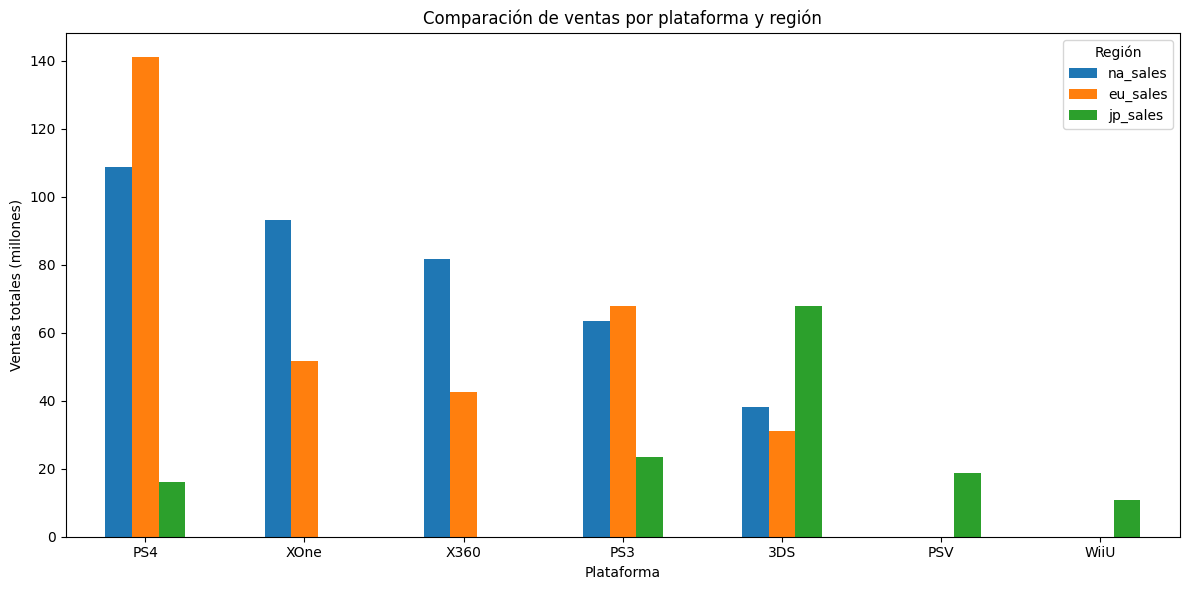

In [ ]:
main_platforms.set_index('platform').plot(kind='bar', figsize=(12,6))
plt.title('Comparación de ventas por plataforma y región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

El top 5 de plataformas para la región de Norteamérica (NA) son: PS4, XOne, X360, PS3, 3DS en ese orden de más ventas. En general las consolas no portátiles venden más juegos que las que son portátiles como el Nintendo 3DS.
El top 5 de plataformas para la región de Europa (EU) son: PS4, PS3, XOne, X360, 3DS en ese orden de más ventas. PS4 vende más juegos en Europa que en NA. Y en general esta región muestra preferencia por juegos de consolas de Sony (PS4 Y PS3) que por las de Microsoft. Y Nintendo 3DS también vende menos.
El top 5 de plataformas para la región de Japón (JP) son: 3DS, PS3, PSV, PS4, WiiU en ese orden de más ventas. Nintendo 3DS domina en esta región, lo que indica una preferencia por consolas portátiles. Las consolas de Sony (PS3, PSV, PS4) tienen presencia significativa y a diferencia de las otras regiones, PS4 no es tan dominante. Microsoft no aparece en el top 5 del mercado japonés (XBOX).


## 3.2 Géneros principales por región 

In [ ]:
na_main_genre = df_recent.groupby('genre')['na_sales'].sum().sort_values(ascending= False).head()
#print('Plataformas principales para región NA:\n', na_main_platforms)
eu_main_genre = df_recent.groupby('genre')['eu_sales'].sum().sort_values(ascending= False).head()
#print('Plataformas principales para región EU: \n', eu_main_platforms)
jp_main_genre= df_recent.groupby('genre')['jp_sales'].sum().sort_values(ascending= False).head()
#print('Plataformas principales para región JP:\n', jp_main_platforms)
temp_main_genre = pd.merge(na_main_genre,eu_main_genre, on='genre', how='outer')
main_genre = pd.merge(temp_main_genre, jp_main_genre,on='genre', how= 'outer')
main_genre = main_genre.reset_index()
print(main_genre)

          genre  na_sales  eu_sales  jp_sales
0        Action    126.05    118.13     40.49
1       Shooter    109.74     87.86      6.61
2        Sports     65.27     60.52       NaN
3  Role-Playing     46.40     36.97     51.04
4          Misc     27.49       NaN      9.20
5        Racing       NaN     20.19       NaN
6      Fighting       NaN       NaN      7.65


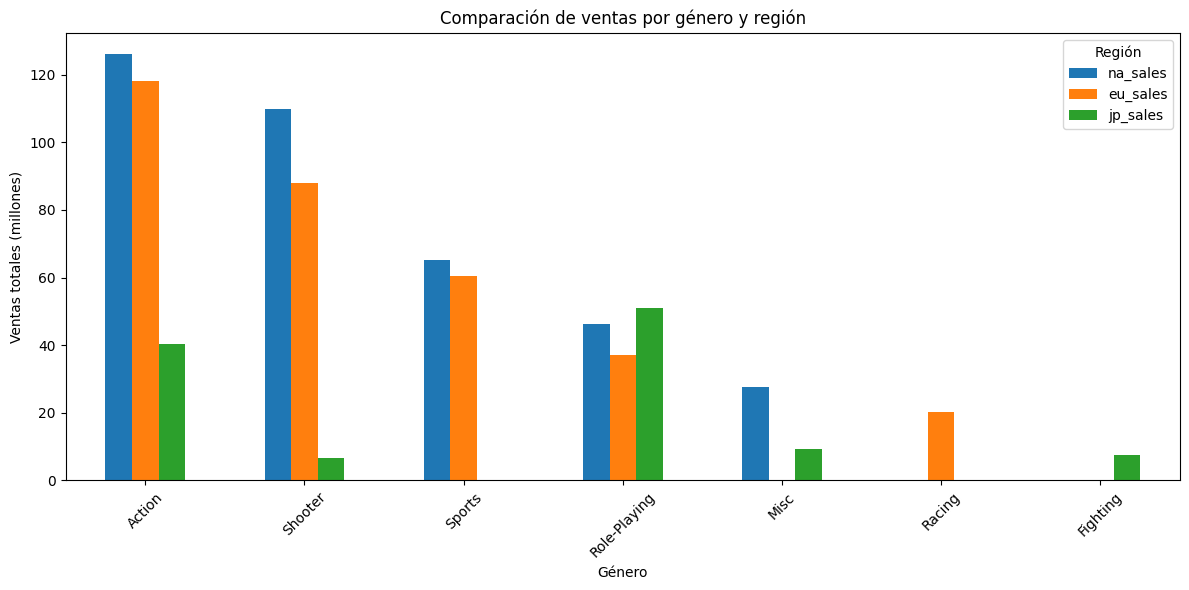

In [ ]:
main_genre.set_index('genre').plot(kind='bar', figsize=(12,6))
plt.title('Comparación de ventas por género y región')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

Los géneros principales más vendidos de la región de NA son Action, Shooter, Sports, Role-Playing y Misc (en ese orden).  El mercado NA está dominado por los géneros Action y Shooter, superando los 100 millones de  USD.
Los géneros principales más vendidos de la región de EU son Action, Shooter, Sports, Role-Playing y Racing (en ese orden).  El mercado en esta región se parece mucho al de  NA, pero a diferencia de éste, el género Racing entra al top 5 lo que indica cierta preferencia a los juegos de carreras o que involucran carros.  
Los géneros principales más vendidos en la región JP son Role-Playing , Action, Misc, Fighting, Shooter (en ese orden).  El mercado en esta región es diferente de los de NA y EU. El género Role-Playing (RPG) es el más vendido del país. Los géneros Action y Shooter no tienen el dominio que tienen en Occidente. Por otro lado, el género Fighting es relevante es Japón pero no en las otras regiones. 


## 3.3 Clasificaciones de Entertainment Software Rating Board (ESRB) y ventas por región

In [ ]:
#Filtramos del dataset periodo 2013- 2016, datos de  ventas por regiones y su rating 
rating_ESRB = df_recent[['na_sales','eu_sales','jp_sales','rating']]
print('Clasificaciones ESRB :', df_recent['rating'].unique())
print('# de Valores nulos o sin rating:', rating_ESRB['rating'].isnull().sum())
#AGRUPAR 
rating_sales = rating_ESRB.groupby('rating')[['na_sales','eu_sales','jp_sales']].agg(['sum','mean','median','var','std'])
rating_sales2 = rating_ESRB.groupby('rating')[['na_sales','eu_sales','jp_sales']].mean()
print(rating_sales)


Clasificaciones ESRB : ['M' nan 'E' 'T' 'E10+']
# de Valores nulos o sin rating: 977
       na_sales                                      eu_sales            \
            sum      mean median       var       std      sum      mean   
rating                                                                    
E         79.05  0.261755   0.05  0.222829  0.472048    83.36  0.276026   
E10+      54.24  0.215238   0.12  0.100506  0.317026    42.69  0.169405   
M        165.21  0.447724   0.14  0.832345  0.912329   145.32  0.393821   
T         49.79  0.149520   0.04  0.112833  0.335906    41.95  0.125976   

                                  jp_sales                             \
       median       var       std      sum      mean median       var   
rating                                                                  
E       0.055  0.502610  0.708950    15.14  0.050132   0.00  0.029999   
E10+    0.100  0.043018  0.207409     5.89  0.023373   0.00  0.011658   
M       0.130  0.660705 

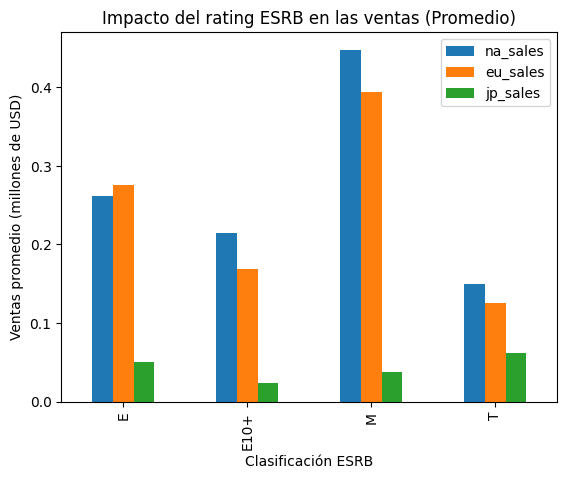

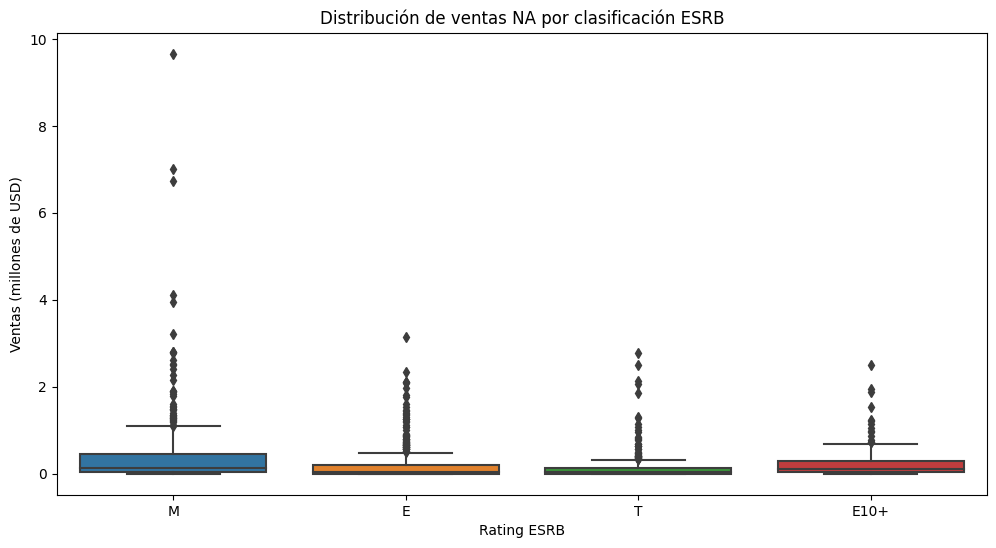

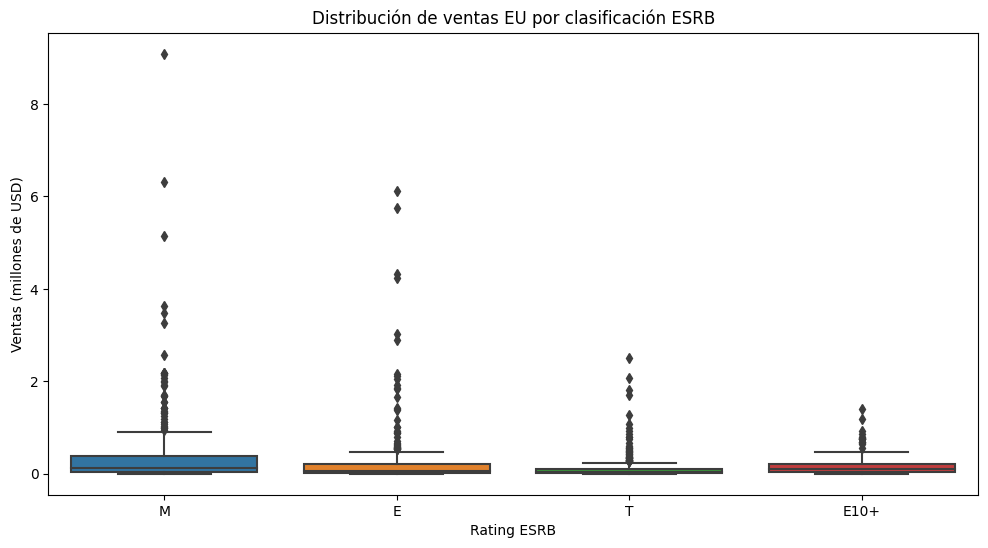

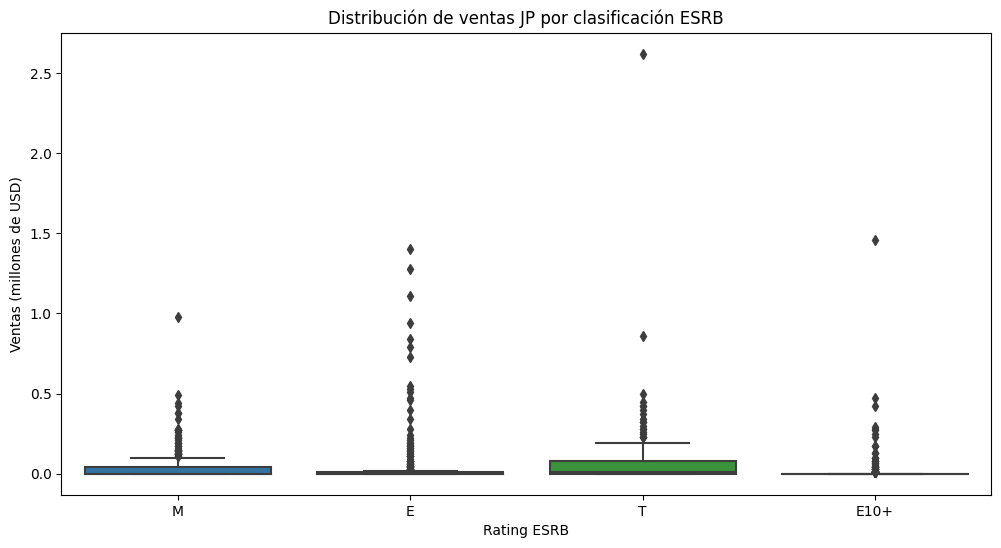

In [ ]:
rating_sales2.plot(kind='bar',xlabel='Clasificación ESRB', ylabel='Ventas promedio (millones de USD)',
                  title='Impacto del rating ESRB en las ventas (Promedio)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rating_ESRB, x='rating', y='na_sales')
plt.title('Distribución de ventas NA por clasificación ESRB')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (millones de USD)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rating_ESRB, x='rating', y='eu_sales')
plt.title('Distribución de ventas EU por clasificación ESRB')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (millones de USD)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rating_ESRB, x='rating', y='jp_sales')
plt.title('Distribución de ventas JP por clasificación ESRB')
plt.xlabel('Rating ESRB')
plt.ylabel('Ventas (millones de USD)')
plt.show()



Las clasificaciones ESRB afectan las ventas por región?
Cómo podemos observar las ventas totales en general son mayores  para el rating M (Mature) en EU (145.32) y NA (165.21) pero no para JP (M = 14.11). JP tiene más ventas totales para la clasificación T (Teen) con 20.59 millones de dólares. En cuanto al promedio observamos algo similar. 
Para las regiones EU y NA, el rating tiene cierto impacto especialmente para juegos M. Esto quiere decir que si un juego se clasifica como M no garantiza ventasaltas pero permite verpara algunos juegos mayores ventas.
Las ventas en JP son muy homogéneas, independientemente del rating, aunque el rating T tiene mayor promedio, las diferencias no son tan grandes en comparación a las otras regiones.Además de que no hay muchos juegos con grandes éxitos y que  vendan mucho con/ por un rating específico.  

## 4. Pruebas de hipótesis 

## 4.1 Hipótesis 1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Prueba de hipótesis de 2 colas 
alpha = 0.05
Ho: 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas'
Ha: 'Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes'
Para comparar promedios de muestras independientes haremos un t-test con varianzas distintas 

In [ ]:
df_recent['user_score'] = pd.to_numeric(df_recent['user_score'], errors='coerce')
#FILTRAR 
xone_scores = df_recent.loc[df_recent['platform'] == 'XOne', 'user_score']
pc_scores = df_recent.loc[df_recent['platform'] == 'PC', 'user_score']
#Quitar valores NaN
xone_scores = xone_scores.dropna()
pc_scores = pc_scores.dropna()

#print(xone_scores.unique())
#print(pc_scores.unique())

#Prueba de hipótesis
alpha = 0.05
result = st.ttest_ind(xone_scores, pc_scores,equal_var= False)
print('Valor p : ', result.pvalue)
if(result.pvalue < alpha):
    print('Rechazamos la Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes')
else: 
    print('No se puede rechazar Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares')

Valor p :  0.14759594013430463
No se puede rechazar Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares


/tmp/ipykernel_34/4062059588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['user_score'] = pd.to_numeric(df_recent['user_score'], errors='coerce')


Dado que el valor p (0.148) es mayor que el nivel de significancia (α = 0.05), no se rechaza la hipótesis nula. Esto indica que no existe evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los usuarios difieren entre las plataformas Xbox One y PC. En otras palabras, la percepción de los usuarios sobre los juegos es similar en ambas plataformas, ya que presentan promedios de calificación comparables y una variabilidad similar en las evaluaciones (Seguramente tienen juegos tanto bien calificados como los que no). Nota: También se podría ampliar el tamaño de la muestra y volver a realizar la prueba 

## 4.2 Hipótesis 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Prueba de hipótesis de 2 colas 
alpha = 0.05
Ho: 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas'
Ha: 'Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes'
Para comparar promedios de muestras independientes haremos un t-test con varianzas distintas 

In [ ]:
df_recent['user_score'] = pd.to_numeric(df_recent['user_score'], errors='coerce')
#FILTRAR 
action_genre = df_recent.loc[df_recent['genre'] == 'Action', 'user_score']
sports_genre = df_recent.loc[df_recent['genre'] == 'Sports', 'user_score']
#Quitar valores NaN
action_genre = action_genre.dropna()
sports_genre = sports_genre.dropna()
#Prueba de hipótesis
alpha = 0.05
result = st.ttest_ind(sports_genre, action_genre,equal_var= False)
print('Valor p : ', result.pvalue)
if(result.pvalue < alpha):
    print('Rechazamos la Ho: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes')
else: 
    print('No se puede rechazar Ho: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son similares')


Valor p :  1.4460039700704315e-20
Rechazamos la Ho: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes


/tmp/ipykernel_34/1796995162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['user_score'] = pd.to_numeric(df_recent['user_score'], errors='coerce')


Dado que el valor p es significativamente menor que el nivel de significancia (α = 0.05), se rechaza la hipótesis nula. Esto indica que existe evidencia estadísticamente significativa de que las calificaciones promedio de los usuarios difieren entre los géneros de Acción y Deportes. En otras palabras, los usuarios evalúan de manera distinta los juegos de estos dos géneros.

## Conclusiones 
A lo largo del proyecto se realizó un análisis del mercado de videojuegos considerando ventas por región, plataformas, géneros, clasificaciones ESRB y calificaciones de usuarios y críticos, con el objetivo de identificar patrones de consumo y evaluar factores que influyen en las ventas.
El análisis regional mostró diferencias en las preferencias de los usuarios. Norteamérica y Europa presentan comportamientos similares, con preferencia a consolas no portátiles (principalmente PlayStation y Xbox), mientras que Japón prefiere consolas portátiles y títulos asociados a ese formato. 
En cuanto a los géneros, se observó que Action y Shooter dominan las ventas en NA y EU, mientras que Role-Playing es el género líder en Japón. Esto confirma que los gustos del consumidor varían significativamente entre Occidente y Japón, lo cual debe considerarse para el desarrollo y lanzamiento de videojuegos.
El análisis de las clasificaciones ESRB mostro que afectan el comportamiento de ventas, pero de manera distinta según la región. En NA y EU, los juegos con clasificación M (Mature) presentan los mayores promedios de ventas, aunque también la mayor dispersión, lo que implica cierto éxito pero también mayor riesgo. En contraste, en Japón las ventas son más homogéneas entre clasificaciones, con menor variabilidad, lo que sugiere que el rating tiene un impacto limitado o menor.
Finalmente, en las pruebas de hipótesis no se encontró diferencia significativa entre las calificaciones promedio de los usuarios en Xbox One y PC. Es decir, las calificaciones no dependen de una preferencia a cierta plataforma. Sin embargo, sí se identificó una diferencia estadísticamente significativa entre las calificaciones promedio de los géneros Acción y Deportes, confirmando que el tipo de género influye en la valoración que hacen los usuarios.
En conjunto, los resultados del proyecto muestran que el éxito comercial de un videojuego depende de una combinación de factores: región, género, plataforma y clasificación. Las empresas que adapten sus estrategias considerando estas diferencias regionales y de contenido tendrán mayores probabilidades tener mejores ventas y aceptación de los usuarios.
